# Adaptive algorithms
Apart from two non-adaptive algorithms (_unifrom exploration_ and _epsilon-greedy_) mentioned in [the pervious notebook](./01_simple_non_adaptive_algorithms.ipynb), in this chapter we present two examples of more advance - adaptive alorithms: successive elimination and UCB1 algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bandito import Bandito
from bandito.arms import Bernoulli
from bandito.policies import SuccessiveElimination, UCB1
import warnings
warnings.filterwarnings('ignore')

In [2]:
t_max = 1000
q = t_max ** (2 / 3) * (4 * np.log(t_max)) ** (1 / 3) / (t_max * 4)
policy_ucb = UCB1(t_max)
policy_se = SuccessiveElimination(t_max)
arms = [
    Bernoulli(t_max, p=0.2, a=0.1, b=1.1),
    Bernoulli(t_max, p=0.2, a=0.5, b=1.5),
    Bernoulli(t_max, p=0.5, a=0, b=1),
    Bernoulli(t_max, p=0.7, a=-0.2, b=1.8)
]
b_ucb = Bandito(policy_ucb, arms, t_max)
b_se = Bandito(policy_se, arms, t_max)
bandito_run_ucb = b_ucb()
bandito_run_se = b_se()

3


## Policies
For each arm we find a _upper / lower confidnce bounds_:
 - $\texttt{UCB}_t(i) = \overline{\mu}_t(i) + r_t(i)$ upper confidence bound of arm $i$ at time $t$
 - $\texttt{LCB}_t(i) = \overline{\mu}_t(i) - r_t(i)$ lower confidence bound of arm $i$ at time $t$

where $\overline{\mu}_t(i)$ is an _average reward_ (_so far_) of arm $i$ at time $t$ and $r_t(i)$ is a _confidence radius_ of arm $i$ at time $t$ defined as: $r_i(t) = \sqrt{\frac{2\ log(t_{max})}{n_t(i)}}$

### Successive Elimination policy
```
initiate: all arms are active
for each round t = 1, 2,..., t_max:
    for each active arm:
        alternate all active arms
        deactivate all arms such that exists arm i' which UCB_t(i) < LCB_t(i')
```

### UCB1 policy
```
initiate: try each arm 
    for each round  t = 1, 2,..., t_max:
        play arm i with max(UCB_t(i)) among all arms       
```

## Regret  

**Theorem 3.**: Successive Elimination policy algorithm achieves regret bound $\mathbb{E}\big[R(t_{max})\big]\ = O(\sqrt{m\ t\ log(t_{max})})$ at every round $t$ [1].


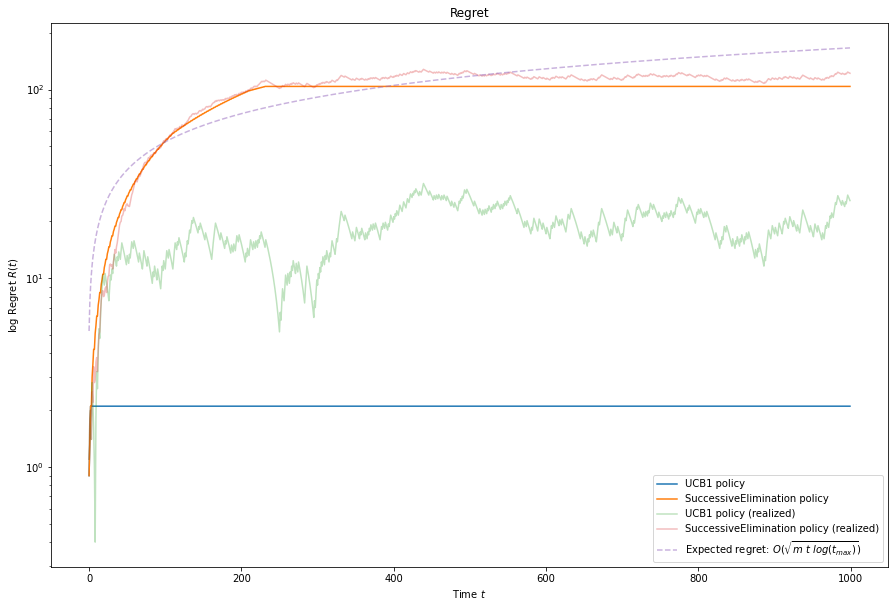

In [3]:
t = np.arange(1, t_max + 1)

plt.figure(figsize=(15, 10))
plt.yscale("log")
plt.title(f"Regret")
plt.xlabel(r"Time $t$")
plt.ylabel(r"log Regret $R(t)$")
plt.plot(bandito_run_ucb.regred, label=r"UCB1 policy")
plt.plot(bandito_run_se.regred, label=r"SuccessiveElimination policy")
plt.plot(bandito_run_ucb.realized_regred, label=r"UCB1 policy (realized)", alpha=0.3)
plt.plot(bandito_run_se.realized_regred, label=r"SuccessiveElimination policy (realized)", alpha=0.3)
plt.plot(
    bandito_run_se.expected_regred, 
    "--", 
    label=r"Expected regret: $O(\sqrt{m\ t\ log(t_{max})})$",
    alpha=0.5
)
plt.legend()
plt.show()

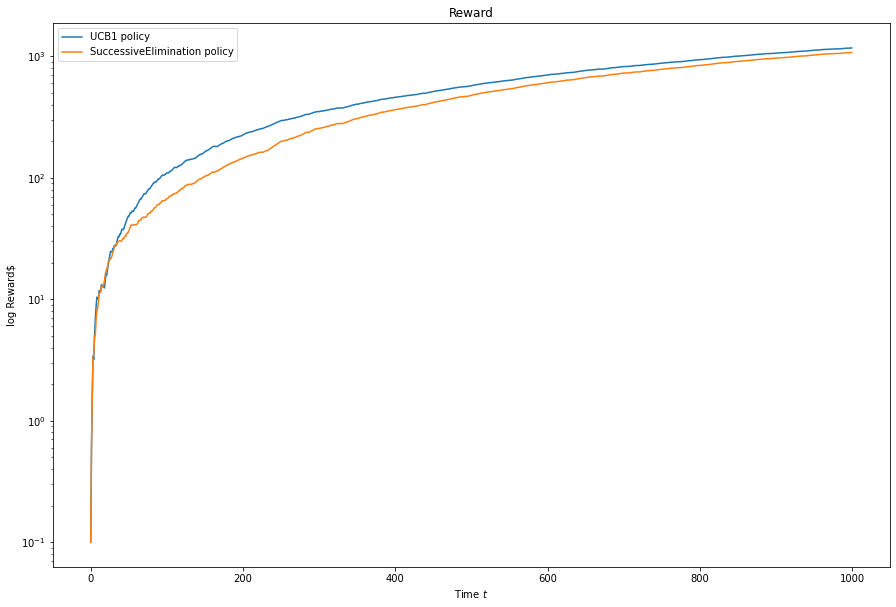

In [4]:
plt.figure(figsize=(15, 10))
plt.title(f"Reward")
plt.yscale("log")
plt.xlabel(r"Time $t$")
plt.ylabel(r"log Reward$")
plt.plot(np.cumsum(bandito_run_ucb.reward), label=r"UCB1 policy")
plt.plot(np.cumsum(bandito_run_se.reward), label=r"SuccessiveElimination policy")
plt.legend()
plt.show()

## References
[1] Slivkins A. (2019), *Introduction to Multi-Armed Bandits*, arXiv:1904.07272, https://arxiv.org/abs/1904.07272